<a href="https://colab.research.google.com/github/AJSTYLE-lab/Fundamental-of-BIg-Data-Analysis/blob/main/BIG%20DATA%20LABS/LAB%233/L21_7692_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTINF LIBRARY:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#IMPORTING .csv FILE:

In [ ]:
FILE=pd.read_csv("Mall_Customers.csv")
FILE


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#ELBOW METHOD:

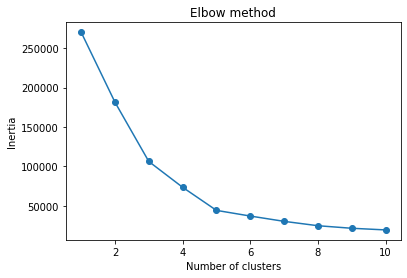

In [ ]:
from sklearn.cluster import KMeans
x=FILE["Annual Income (k$)"]
y=FILE["Spending Score (1-100)"]
data = list(zip(x, y))
inertias = []

for i in range(1,11):
 kmeans = KMeans(n_clusters=i)
 kmeans.fit(data)
 inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#SCATTERING BY DEFINING CLUSTERS:

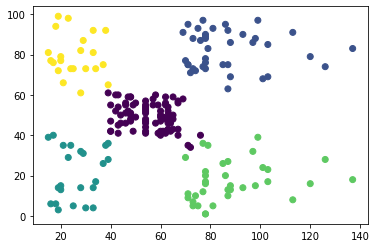

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)

#TASK B:

In [ ]:
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(data)
scaled_data = FILE[["Age","Annual Income (k$)","Spending Score (1-100)"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_fit_data = scaler.fit_transform(scaled_data)

In [ ]:
scaled_fitted_data = pd.DataFrame(scaled_fit_data)
scaled_fitted_data.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]

In [ ]:
LIST = scaled_fitted_data[["Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(LIST)

KMeans(n_clusters=4)

In [ ]:
LIST_TWO = []
#LIST_TWO IS USED TO STORE CALCULATED SQUARED DISTANCE VALUE.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(LIST)
    
    LIST_TWO.append(kmeans.inertia_)
print("SSD/SUM OF SQUARED DISTANCE=",LIST_TWO)    

SSD/SUM OF SQUARED DISTANCE= [400.00000000000006, 270.8923594673905, 157.7040081503594, 108.92131661364358, 65.56840815571681, 55.057348270386015, 44.86475569922557, 37.182925370178495, 32.375253681582876, 29.11556455754576]


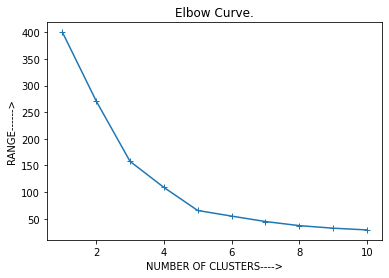

In [ ]:
plt.plot(range(1,11),LIST_TWO,marker="+")
plt.title("Elbow Curve.")
plt.xlabel("NUMBER OF CLUSTERS---->")
plt.ylabel("RANGE------>")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(LIST)

KMeans(n_clusters=4)

#ADDING ONE MORE ATTRIBUTE NAMES (Label):

In [ ]:
FILE["Label"] = kmeans.labels_
FILE


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,3


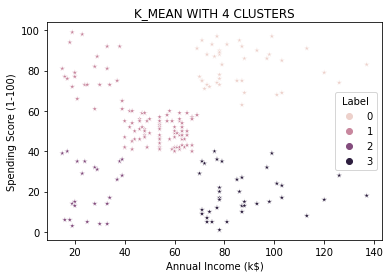

In [ ]:
import seaborn as sns
plt.title("K_MEAN WITH 4 CLUSTERS")
sns.scatterplot(data=FILE, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label",marker="*")
plt.show()